**Loading Data and Libraries**

In [1]:
df <- read.csv("./data/bs140513_032310.csv")

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(dplyr)
library(DT)
library(ggthemes)
library(randomForest)
library(InformationValue)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



Then we need to factorize our parameters to make it easier for our ML models to learn.

In [2]:
df$step = factor(df$step)
df$customer = factor(df$customer)
df$age = factor(df$age)
df$gender = factor(df$gender)
df$zipcodeOri = factor(df$zipcodeOri)
df$merchant = factor(df$merchant)
df$zipMerchant = factor(df$zipMerchant)
df$category = factor(df$category)
df$fraud = factor(df$fraud)

Now let's look at our data in more details.

In [3]:
summary(df)

      step                 customer           age         gender      
 175    :  3774   'C1978250683':   265   '2'    :187310   'E':  1178  
 177    :  3758   'C1275518867':   252   '3'    :147131   'F':324565  
 152    :  3746   'C806399525' :   237   '4'    :109025   'M':268385  
 174    :  3743   'C515668508' :   205   '5'    : 62642   'U':   515  
 178    :  3743   'C1338396147':   195   '1'    : 58131               
 173    :  3739   'C1896850232':   192   '6'    : 26774               
 (Other):572140   (Other)      :593297   (Other):  3630               
   zipcodeOri              merchant       zipMerchant    
 '28007':594643   'M1823072687':299693   '28007':594643  
                  'M348934600' :205426                   
                  'M85975013'  : 26254                   
                  'M1053599405':  6821                   
                  'M151143676' :  6373                   
                  'M855959430' :  6098                   
                  (Other) 

As we can see there is a huge difference between the amount of fraud in our dataset, let's see how they are distributed.

In [4]:
frauddd1 <- df %>%
  group_by(df$amount) %>%
  dplyr::summarize(Total = n())


ggplot(frauddd1, aes(frauddd1$`df$amount`, Total,fill = I("#fec106"))) + 
  geom_bar( stat = "identity",colour="#FF9999") + xlab("Amount")+ylab("Total")+theme(axis.text.x = element_text(angle = 90, hjust = 1))

ERROR: Error in mutate_impl(.data, dots): invalid subscript type 'double'


Let's see our data with plots!

In [5]:
frauddd1 <- df %>%
  group_by(df$amount) %>%
  dplyr::summarize(Total = n())


frauddd2 <- df %>%
  group_by(df$age) %>%
  dplyr::summarize(Total = n())


frauddd3 <- df %>%
  group_by(df$gender) %>%
  dplyr::summarize(Total = n())

frauddd4 <- df %>%
  group_by(df$category) %>%
  dplyr::summarize(Total = n())

frauddd5 <- df %>%
  group_by(df$step) %>%
  dplyr::summarize(Total = n())



#Visualizing 

ggplot(frauddd1, aes(frauddd1$`df$amount`, Total,fill = I("#fec106"))) + 
  geom_bar( stat = "identity",colour="#FF9999") + xlab("Amount")+ylab("Total")+theme(axis.text.x = element_text(angle = 90, hjust = 1))


ggplot(frauddd2, aes(frauddd2$`df$age`, Total,fill=I("#4699dd"))) + 
  geom_bar( stat = "identity",colour="#FF9999") + xlab("Age")+ylab("Total")

ggplot(frauddd3, aes(frauddd3$`df$gender`, Total,fill = I("#56ddc5"))) + 
  geom_bar( stat = "identity",colour="#FF9999") + xlab("Gender")+ylab("Total")

ggplot(frauddd4, aes(frauddd4$`df$category`, Total,fill = I("#f89685"))) + 
  geom_bar( stat = "identity") + xlab("Category")+ylab("Total") +theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggplot(frauddd5, aes(frauddd5$`df$step`, Total,fill = I("#4699dd"))) + 
  geom_bar( stat = "identity" ) + xlab("Step")+ylab("Total")+theme(axis.text.x = element_text(angle = 90, hjust = 1))

ERROR: Error in mutate_impl(.data, dots): invalid subscript type 'double'


Cool, now we are ready to build a model for our data.

**Building ML Model**

By looking at our data we can see some of them are constant like zipMerchant and also zipCode so we can ignore them, Customer has so many factors which mean it can make our model slow, so we take the age, amount, merchant, category and gender to make our model.


Call:
 randomForest(x = train_data[, -ncol(train_data)], y = train_data$fraud,      xtest = test_data[, -ncol(test_data)], ytest = test_data$fraud,      ntree = 200, classwt = c(0.7, 0.3), keep.forest = T) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 2

        OOB estimate of  error rate: 1.54%
Confusion matrix:
       0    1 class.error
0 386402 1346 0.003471327
1   4716    0 1.000000000
                Test set error rate: 1.58%
Confusion matrix:
       0   1 class.error
0 198983 712 0.003565437
1   2484   0 1.000000000

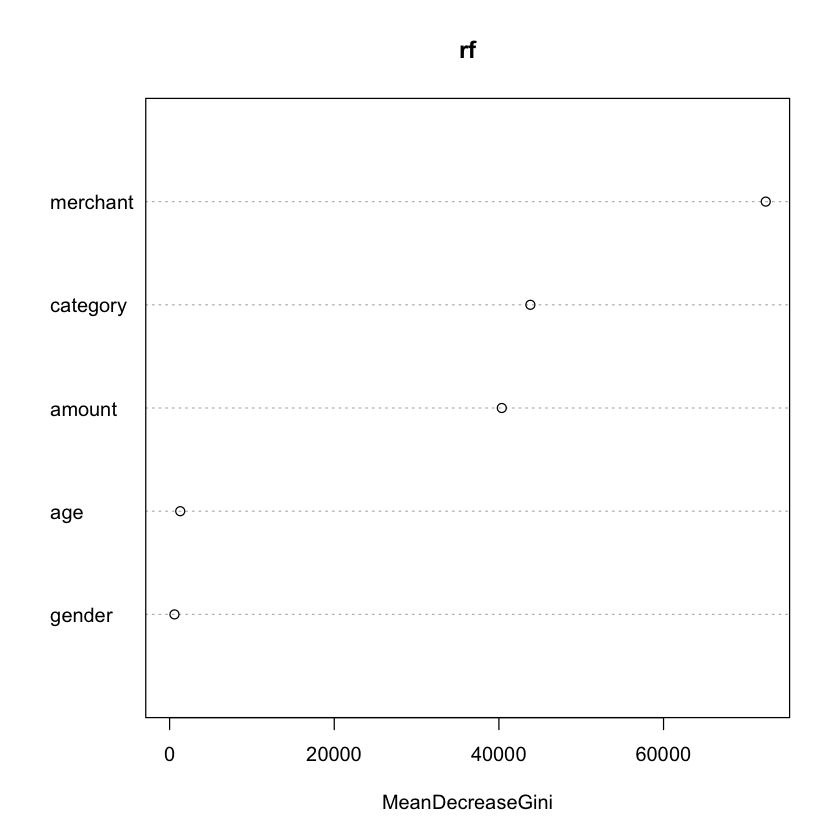

In [6]:
dff = df[,c("merchant","category","gender","age","amount","fraud")]

train_sample = sample(nrow(dff), size = nrow(dff)*0.66)
train_data = dff[train_sample,]
test_data = dff[-train_sample,]


rf = randomForest(y=train_data$fraud, x = train_data[, -ncol(train_data)],
                  ytest = test_data$fraud, xtest = test_data[, -ncol(test_data)],
                  ntree = 200,classwt = c(0.7, 0.3),keep.forest = T)
varImpPlot(rf,type=2)
rf

Age and gender are not important in making our model as we can see, so let's look each of amount, category and merchant partial dependency.

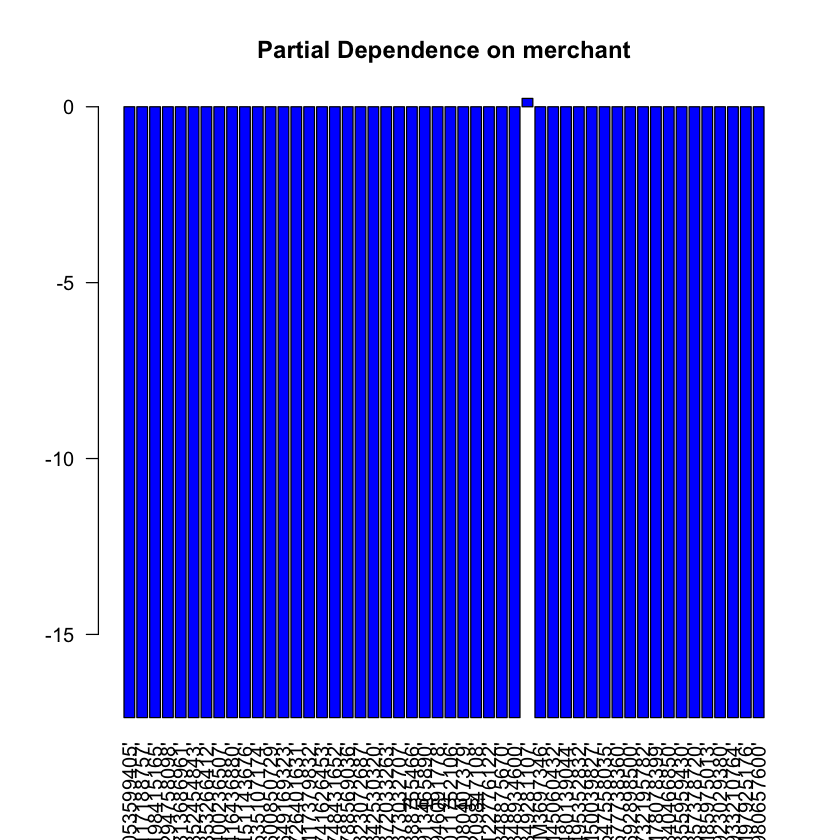

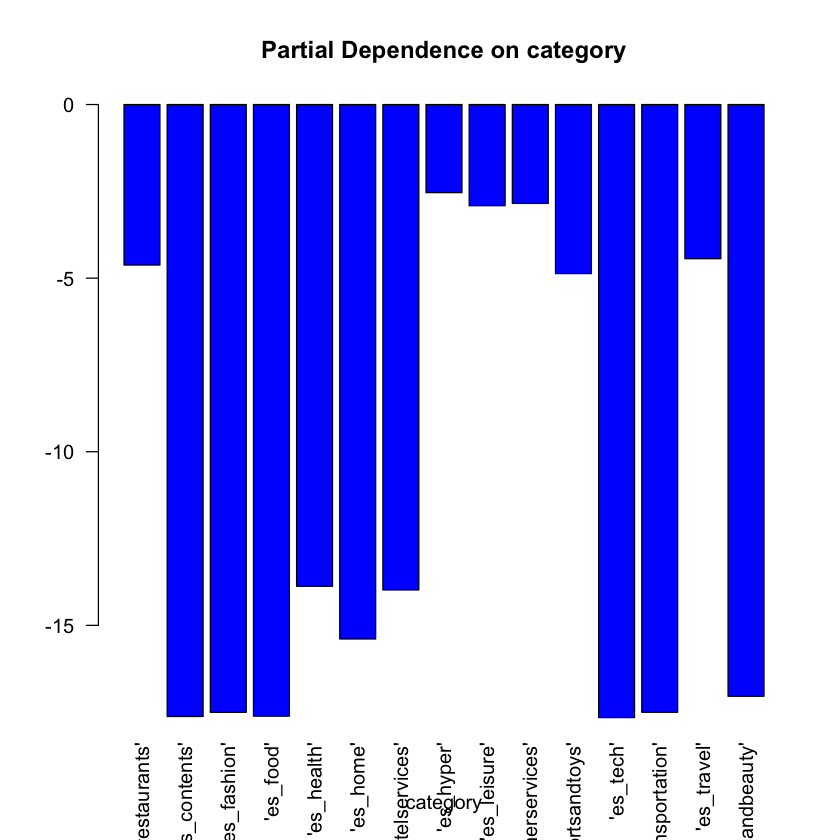

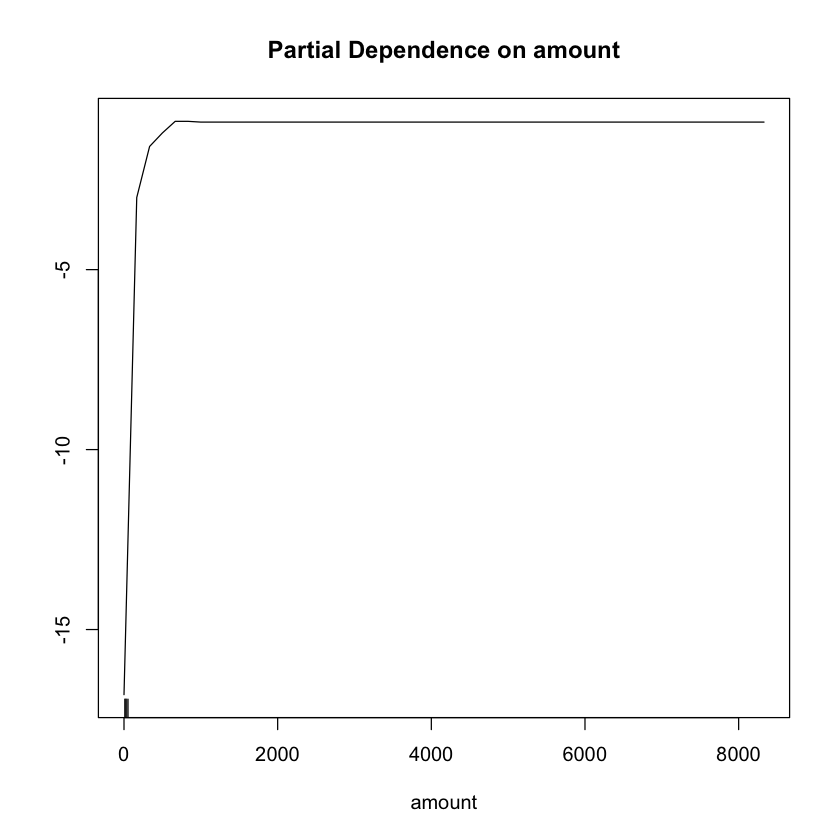

In [7]:
partialPlot(rf, train_data,merchant , 1,las=2)
partialPlot(rf, train_data,category , 1,las=2)
partialPlot(rf, train_data,amount , 1)

Seems interesting, most of the frauds happened in a range between 0 and 500 as we can see in our above plots, but now we can see the dependency of our amount in predicting the fraud, the higher we go in our amount there is a higher chance that's going to be flagged as fraud. However, most of the cases in our data are the ones that haven't been flagged. So we are going to set a cutoff of 800 for our model so basically, we are trying to feed our model both side of our data.

In [8]:
df = df[df$amount<800,]
df$amount <- cut(df$amount,breaks=50,dig.lab=2,labels=1:50)

Merchant, category and amount are the most important features in our dataset for predicting frauds. Now we take those parameters and make our new model because our RandomForrest didn't do well and it might because our data is too sharp and unbalanced, so we are going to use logistic regression which is more likely to be useful in our case.

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

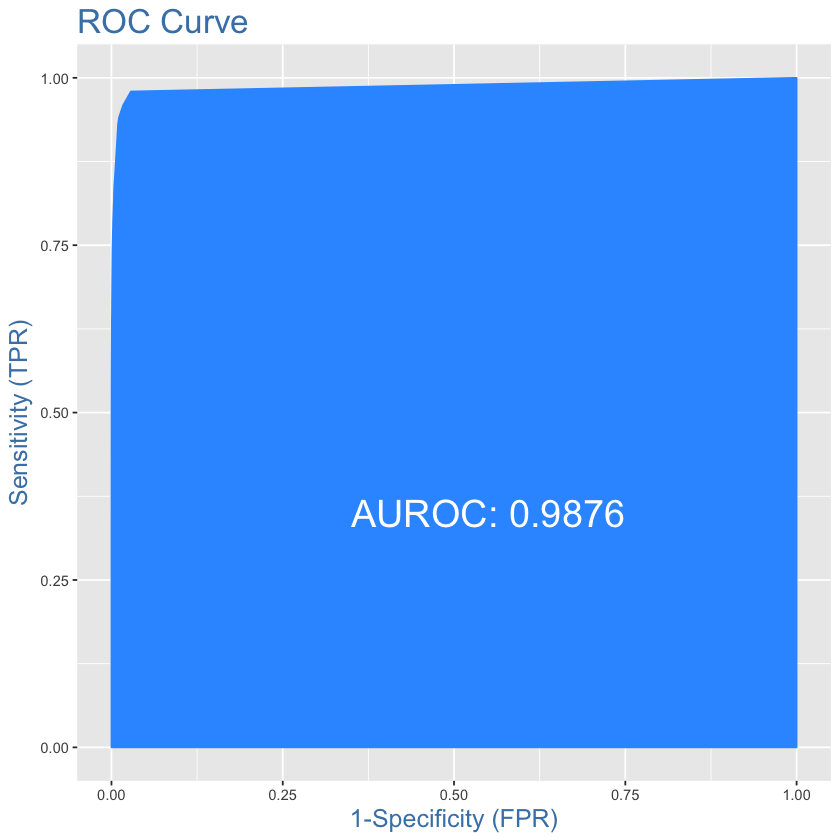

In [9]:
dff = df[,c("merchant","category","amount","fraud")]

train_sample = sample(nrow(dff), size = nrow(dff)*0.66)
train_data = dff[train_sample,]
test_data = dff[-train_sample,]

logitMod <- glm(fraud~ merchant+category+amount, data=train_data, family=binomial(link="logit"))
predicted <- predict(logitMod, test_data, type="response")
plotROC(test_data$fraud, predicted)

Getting a ROC score around .99 is pretty good, so now we are going to test sensitivity and specificity to see some other aspects of our model.

In [ ]:
optCutOff <- optimalCutoff(test_data$fraud, predicted)[1]

misClassError(test_data$fraud, predicted, threshold = optCutOff)
sensitivity(test_data$fraud, predicted, threshold = optCutOff)
specificity(test_data$fraud, predicted, threshold = optCutOff)

We got around .99 for false detection and .70 for positive detection which are pretty good numbers for our model. Thanks for your time :)